In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [9]:
df = pd.read_csv("data/stud.csv")

In [10]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
X = df.drop(columns=['math score'],axis=1)

In [13]:
y = df['math score']

In [14]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_tranformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_tranformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [15]:
X = preprocessor.fit_transform(X)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)  
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [18]:
def eval_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true,predicted)
    return mae,mse,rmse,r2

In [19]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "KNeighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBoost Regressor": XGBRegressor(),
    "CatBoost Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(),
}
model_list =[]
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae,model_train_mse,model_train_rmse,model_train_r2 = eval_model(y_train,y_train_pred)
    model_test_mae,model_test_mse,model_test_rmse,model_test_r2 = eval_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Performance on Training Set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("-Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('------------------------------')

    print('Model Performance on Test Set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("-Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model Performance on Training Set
- Root Mean Squared Error: 5.3231
-Mean Absolute Error: 4.2667
- R2 Score: 0.8743
------------------------------
Model Performance on Test Set
- Root Mean Squared Error: 5.3940
-Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Ridge Regression
Model Performance on Training Set
- Root Mean Squared Error: 5.3233
-Mean Absolute Error: 4.2650
- R2 Score: 0.8743
------------------------------
Model Performance on Test Set
- Root Mean Squared Error: 5.3904
-Mean Absolute Error: 4.2111
- R2 Score: 0.8806


Lasso Regression
Model Performance on Training Set
- Root Mean Squared Error: 6.5938
-Mean Absolute Error: 5.2063
- R2 Score: 0.8071
------------------------------
Model Performance on Test Set
- Root Mean Squared Error: 6.5197
-Mean Absolute Error: 5.1579
- R2 Score: 0.8253


KNeighbors Regressor
Model Performance on Training Set
- Root Mean Squared Error: 5.7088
-Mean Absolute Error: 4.5177
- R2 Score: 0.8554
----------------------------

In [21]:
pd.DataFrame(
    list(zip(model_list, r2_list)),
    columns=['Model', 'R2 Score']
).sort_values(by='R2 Score', ascending=False)


,Model,R2 Score
1,Ridge Regression,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.853721
7,CatBoost Regressor,0.851632
8,AdaBoost Regressor,0.851228
6,XGBoost Regressor,0.827797
2,Lasso Regression,0.825320
3,KNeighbors Regressor,0.784030
4,Decision Tree Regressor,0.755423


In [26]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
r2_score = r2_score(y_test,y_pred)
print("R2 Score:",r2_score)

R2 Score: 0.8804332983749564


Text(0, 0.5, 'Predicted Math Scores')

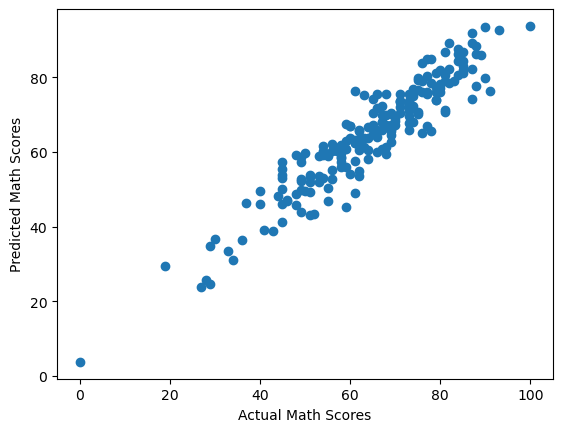

In [27]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")

<Axes: xlabel='math score'>

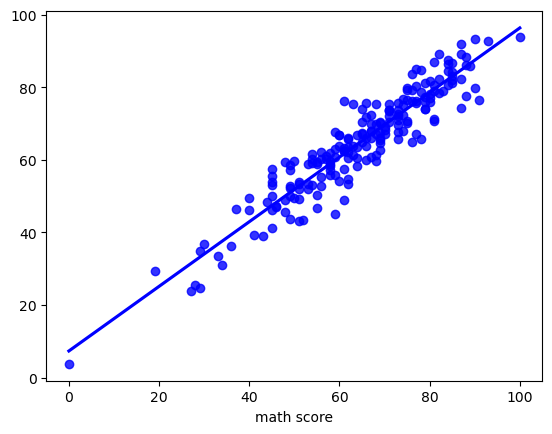

In [28]:
sns.regplot(x=y_test, y=y_pred, ci=None, color="b")

In [31]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': y_test - y_pred})
pred_df

,Actual,Predicted,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
